# Silhoutte Score
$$S=\frac{b(v)-a(v)}{max(a,b)}$$

donde:

+ v:= vector de datos
+ a(v):=distancia media desde v al resto de vectores del mismo cluster
+ b(v):=distancia media desde v a los vectores del cluster más cercano
    
S pertenece al intervalo [-1,1], de tal manera que:

+ S=1  => buena clusterizacion
+ S=0  => overlapping
+ S=-1 => mala clusterizacion

In [1]:
from sklearn import cluster,datasets

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

In [7]:
x,y = datasets.make_moons(n_samples = 500, noise = 0.07)

In [8]:
x = StandardScaler().fit_transform(x)

In [9]:
x

array([[ 3.79732641e-01,  4.78784228e-01],
       [ 1.74630270e+00,  2.85587682e-01],
       [ 1.26584445e+00, -1.15943872e+00],
       [-2.52941722e-01,  1.24362727e+00],
       [ 1.75436639e+00,  3.07017480e-01],
       [-6.58471069e-02,  1.34909132e+00],
       [-4.06851714e-01, -3.20647720e-01],
       [ 2.28875151e-01,  8.79296564e-01],
       [-3.18706838e-01, -7.47209159e-01],
       [-1.68889342e-02, -1.55573552e+00],
       [-1.56209519e+00,  1.84787745e-01],
       [ 1.15848596e+00, -1.10144380e+00],
       [-7.44315530e-01,  1.53821559e+00],
       [-1.30573203e-01,  1.19807846e+00],
       [-5.10954627e-01, -5.07974584e-01],
       [-8.24212808e-02,  1.11032888e+00],
       [ 1.67494403e+00,  1.77643671e-01],
       [-1.55113370e+00,  9.01563595e-01],
       [-1.47298194e+00,  9.03346622e-01],
       [ 5.89519957e-01, -4.92876406e-02],
       [ 5.63269141e-02, -1.16110130e+00],
       [-2.57951017e-01,  1.60941121e+00],
       [-1.40957670e-01, -1.43251542e+00],
       [-3.

In [10]:
y

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

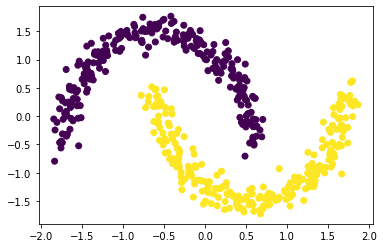

In [11]:
plt.scatter(x[:,0],x[:,1], c = y)

In [13]:
single = cluster.AgglomerativeClustering(n_clusters = 2,linkage = 'single')

In [14]:
single.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)

In [15]:
y_pred_1 = single.labels_

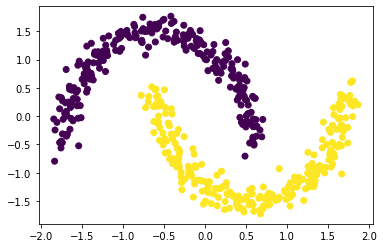

In [16]:
plt.scatter(x[:,0],x[:,1], c = y_pred_1)

In [17]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
y_pred_2 = k_means.labels_

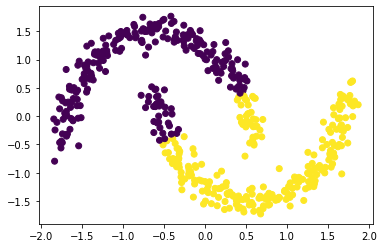

In [20]:
plt.scatter(x[:,0],x[:,1], c = y_pred_2)

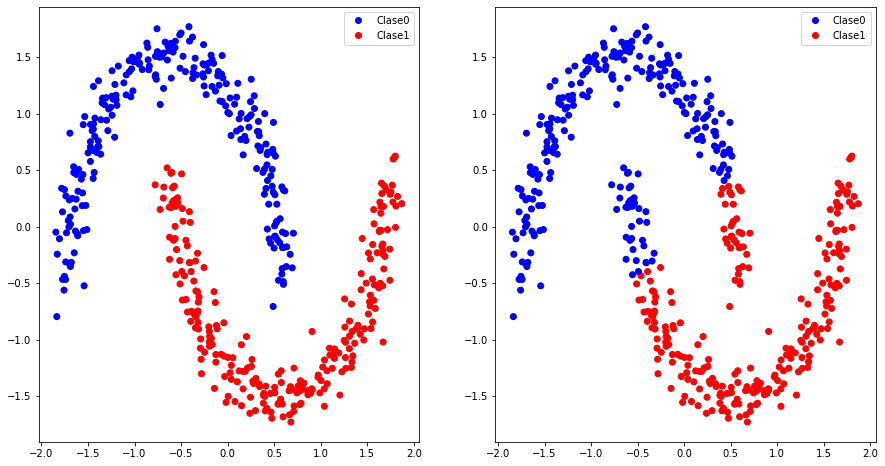

In [21]:
fig,ax = plt.subplots(1,2, figsize = (15,8))

colors = np.array(['blue','red'])

legend_e = [Line2D([0],[0], color = c, marker = 'o',linestyle = '',label = f'Clase{i}') for i,c in enumerate(colors)]

ax[0].scatter(x[:,0],x[:,1], color = colors[y_pred_1])
ax[0].legend(handles = legend_e, loc = 'upper right')

ax[1].scatter(x[:,0],x[:,1], color = colors[y_pred_2])
ax[1].legend(handles = legend_e, loc = 'upper right')

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score()


In [27]:
print(f"Modelo Jerarquico, silhouette score: {silhouette_score(x,y_pred_1, metric= 'cosine')}")

Modelo Jerarquico, silhouette score: 0.47434925196704775


In [29]:
print(f"Modelo Kmeans, silhouette score: {silhouette_score(x,y_pred_2, metric='cosine')}")

Modelo Kmeans, silhouette score: 0.7068157196358745


In [37]:
!pip freeze

absl-py==0.10.0
aenum==2.2.4
aiohttp==3.6.3
appdirs==1.4.4
argon2-cffi==20.1.0
astor==0.8.1
astunparse==1.6.3
async-generator==1.10
async-timeout==3.0.1
asyncio==3.4.3
attrs==20.2.0
autograd==1.3
autograd-gamma==0.5.0
backcall==0.2.0
bar-chart-race==0.1.0
beautifulsoup4==4.9.1
bleach==3.1.5
blis==0.4.1
bokeh==2.2.3
branca==0.4.1
bs4==0.0.1
cachetools==4.1.1
catalogue==1.0.0
catboost==0.24.3
causalnex==0.8.1
certifi==2020.6.20
cffi==1.14.2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.



chardet==3.0.4
chart-studio==1.1.0
click==7.1.2
click-plugins==1.1.1
cligj==0.7.0
cloudpickle==1.6.0
colorama==0.4.3
colorlover==0.3.0
cufflinks==0.17.3
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
dask==2.30.0
dbf==0.99.0
dbfread==2.0.7
ddbscan==0.3.0
decorator==4.4.2
defusedxml==0.6.0
discord==1.0.1
discord.py==1.5.1
distlib==0.3.1
dnspython==2.0.0
entrypoints==0.3
et-xmlfile==1.0.1
ffmpeg-python==0.2.0
filelock==3.0.12
Fiona @ file:///C:/Users/GralG/Downloads/Fiona-1.8.17-cp37-cp37m-win_amd64.whl
Flask==1.1.2
folium==0.11.0
fsspec==0.8.4
future==0.18.2
gast==0.3.3
GDAL @ file:///C:/Users/GralG/Downloads/GDAL-3.1.4-cp37-cp37m-win_amd64.whl
geopandas==0.8.1
google-auth==1.21.2
google-auth-oauthlib==0.4.1
google-pasta==0.2.0
graphviz==0.14.1
grpcio==1.32.0
h5py==2.10.0
hdbscan==0.8.26
hyperopt==0.2.5
idna==2.10
importlib-metadata==1.7.0
ipykernel==5.3.4
ipython==7.18.1
ipython-genutils==0.2.0
ipywidgets==7.5.1
itsdangerous==1.1.0
jdcal==1.4.1
jedi==0.17.2
Jinja2==2.11.2
joblib==0.16.0


In [38]:
from sklearn.metrics.cluster import adjusted_rand_score

In [39]:
y

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [40]:
adjusted_rand_score(y, y_pred_1)

1.0

In [41]:
adjusted_rand_score(y, y_pred_2)

0.49460318072289156

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y,y_pred_1)

array([[250,   0],
       [  0, 250]], dtype=int64)

In [45]:
confusion_matrix(y,y_pred_2)

array([[213,  37],
       [ 37, 213]], dtype=int64)

In [47]:
x, y = datasets.make_blobs(n_samples = 500)

x_2, y_2 = datasets.make_blobs(n_samples = 500,cluster_std= 5.0)

In [48]:
x = StandardScaler().fit_transform(x)

x_2 = StandardScaler().fit_transform(x_2)

In [50]:
ward = cluster.AgglomerativeClustering(n_clusters = 3, linkage='ward')
ward.fit(x)

ward_2 = cluster.AgglomerativeClustering(n_clusters = 3, linkage='ward')
ward_2.fit(x_2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [57]:
x[:,1]

array([-1.29816005, -1.29114049,  0.51208613, -1.26799156,  0.81131262,
        0.72553575,  0.83385264,  0.73264826,  0.69052725,  0.77143199,
       -1.40944612,  0.97496765,  0.88878491, -1.42225594,  0.67683536,
       -1.33895124,  0.7932389 ,  0.79857788,  0.71271285,  0.77456486,
        0.81111879,  0.70496609,  0.39750777,  0.47748896,  0.69684385,
        1.09444349,  0.41386935, -1.69017409, -1.52030831,  0.71870618,
        0.65875644,  0.69585717,  0.54425711, -1.2313547 , -1.45378024,
       -1.32765448,  0.80665677,  0.92483646,  0.43816067, -1.46762112,
       -1.4396294 , -1.34346991,  0.79685331, -1.47560158, -1.2770335 ,
       -0.94795338,  0.6515382 ,  0.54222158,  0.75324688, -1.28366823,
       -1.63971932,  0.41221837,  0.57204967,  0.64933746, -1.15488059,
        0.42711271,  0.56213059,  0.86776212, -1.48281953,  0.53030346,
        0.29597779,  0.64143525,  0.88843849, -1.33243757,  0.76689397,
        0.779392  ,  0.90253145,  0.83572688,  0.77452007,  0.97

In [52]:
y_pred_ward = ward.labels_
y_pred_ward_2 = ward_2.labels_

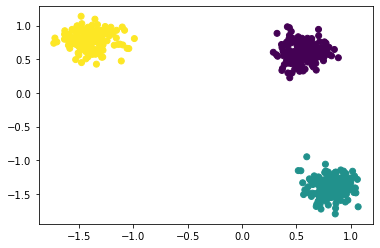

In [59]:
plt.scatter(x[:,0],x[:,1], c =y_pred_ward)

In [62]:
print(f"Modelo Jerarquico, silhouette score: {silhouette_score(x,y_pred_ward)}")

Modelo Jerarquico, silhouette score: 0.8809350408923693


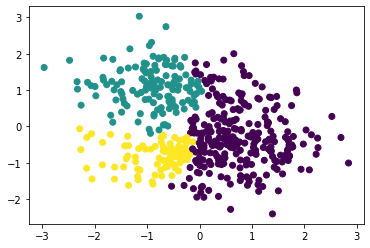

In [61]:
plt.scatter(x_2[:,0],x_2[:,1], c =y_pred_ward_2)

In [63]:
print(f"Modelo Jerarquico, silhouette score: {silhouette_score(x,y_pred_ward_2)}")

Modelo Jerarquico, silhouette score: -0.012554368222479706


# Elbow

**nº óptimo de clusters**


![](data/elbow.png)

In [64]:
from IPython.display import set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
set_matplotlib_formats('svg')

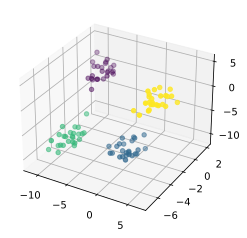

In [65]:
x, y = datasets.make_blobs(n_features=3, centers = 4)

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d' )
ax.scatter(x[:,0],x[:,1], x[:,2], c = y)

In [69]:
n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters = k).fit(x).inertia_)for k in range(1,10)])

In [70]:
n_clusters

(1, 2, 3, 4, 5, 6, 7, 8, 9)

In [71]:
inercia

(6393.287117250323,
 2933.9753552269185,
 1160.955717269917,
 327.3643879285998,
 296.57596002996866,
 272.5768953370748,
 247.92724045130873,
 231.34178598132075,
 206.20430048023613)

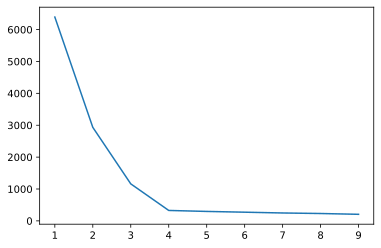

In [74]:
fig = plt.figure()

ax = fig.subplots()

ax.plot(n_clusters, inercia)

In [75]:
from yellowbrick.cluster import KElbowVisualizer

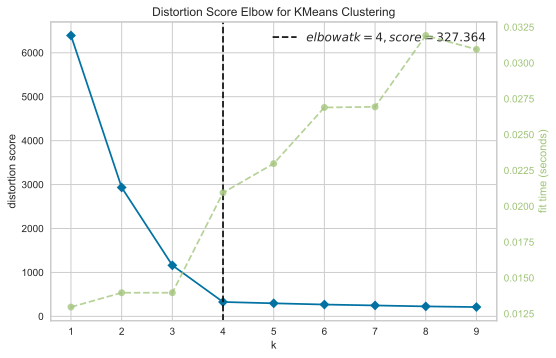

In [76]:
modelo = cluster.KMeans()
visual = KElbowVisualizer(modelo, k = (1,10))
visual.fit(x)
visual.poof();

In [77]:
x, y = datasets.make_moons(n_samples=1500, noise = 0.08)

X = StandardScaler().fit_transform(x)

inercias = []

for i in range(1,10):
    kmeans = cluster.KMeans(n_clusters = i).fit(x)
    inercias.append(kmeans.inertia_)

In [78]:
inercias

[1512.9602722492086,
 611.97696639941,
 409.5398509540347,
 271.2946463804519,
 205.02838310928757,
 140.95683115641884,
 113.6485414432053,
 85.93760817387123,
 73.1101123182874]

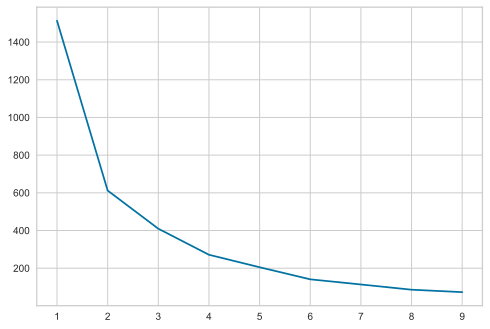

In [79]:
plt.plot(range(1,10),inercias)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


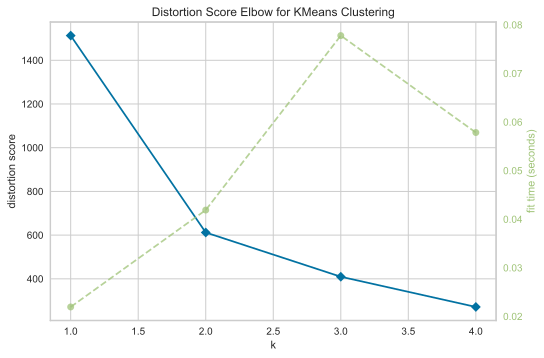

In [80]:
modelo = cluster.KMeans()
visual = KElbowVisualizer(modelo, k =(1,5))
visual.fit(x)
visual.poof();

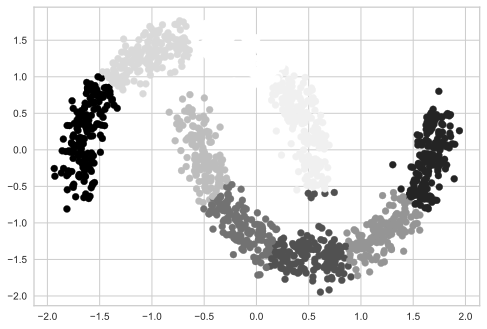

In [81]:
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)

In [86]:
x, y = datasets.make_moons(n_samples=1500, noise = 0.06)

X = StandardScaler().fit_transform(x)

kmeans = cluster.KMeans(n_clusters = 2).fit(X)

In [87]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [88]:
from sklearn.metrics.cluster import contingency_matrix

In [89]:
contingency_matrix(y, kmeans.labels_)

array([[633, 117],
       [116, 634]])

In [90]:
confusion_matrix(y, kmeans.labels_)

array([[633, 117],
       [116, 634]], dtype=int64)

In [91]:
from sklearn.metrics import homogeneity_score

In [92]:
homogeneity_score(y, kmeans.labels_)

0.37697357364917233

In [93]:
adjusted_rand_score(y,kmeans.labels_)

0.474830098234885

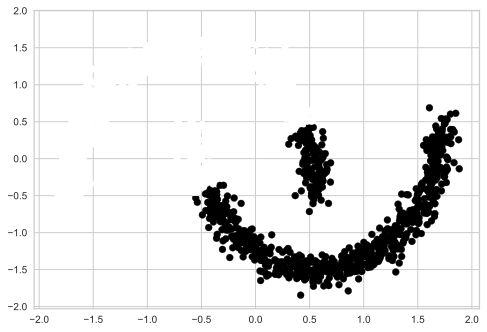

In [94]:
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)